In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
# Loading dataset
df=pd.read_csv("Unit04 Global_GDP.csv")

In [9]:
# Get first 5 entries in the dataset
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [25]:
# Get last 5 entries in the dataset (show data conversion will be required)
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.582020e+11,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.048420e+11,3.879350e+11,3.354420e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10
265,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,1.811554e+10,1.928429e+10,1.805117e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            128 non-null    float64
 5   1961            134 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            154 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            168 non-null    float64
 15  1971            171 non-null    float64
 16  1972            171 non-null    float64
 17  1973            171 non-null    flo

In [9]:
print(df.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 65, dtype: object


In [10]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [3]:
df_numerical = df.select_dtypes(include=[np.number])
df_numerical.corr()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1960,1.000000,0.999467,0.998880,0.998738,0.998979,0.999141,0.998696,0.997955,0.997496,0.997566,...,0.934346,0.964015,0.960479,0.959109,0.958990,0.959974,0.954541,0.952217,0.951082,0.949672
1961,0.999467,1.000000,0.999877,0.999808,0.999820,0.999823,0.999659,0.999334,0.999111,0.999087,...,0.925418,0.957401,0.953255,0.951710,0.951564,0.952763,0.946680,0.944243,0.942930,0.941483
1962,0.998880,0.999877,1.000000,0.999947,0.999844,0.999773,0.999778,0.999635,0.999521,0.999446,...,0.920750,0.953745,0.949333,0.947675,0.947388,0.948653,0.942292,0.939774,0.938356,0.936876
1963,0.998738,0.999808,0.999947,1.000000,0.999921,0.999861,0.999848,0.999756,0.999625,0.999596,...,0.921864,0.954542,0.950096,0.948420,0.948025,0.949311,0.942946,0.940471,0.939017,0.937575
1964,0.998979,0.999820,0.999844,0.999921,1.000000,0.999982,0.999845,0.999687,0.999487,0.999533,...,0.925189,0.957403,0.953059,0.951407,0.950935,0.952193,0.946006,0.943558,0.942113,0.940658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.959974,0.952763,0.948653,0.949311,0.952193,0.954077,0.951859,0.948870,0.946782,0.948502,...,0.985722,0.998472,0.998818,0.999161,0.999944,1.000000,0.999763,0.999582,0.999413,0.999094
2017,0.954541,0.946680,0.942292,0.942946,0.946006,0.948031,0.945665,0.942433,0.940199,0.942005,...,0.986149,0.997860,0.998615,0.999079,0.999839,0.999763,1.000000,0.999894,0.999825,0.999462
2018,0.952217,0.944243,0.939774,0.940471,0.943558,0.945657,0.943458,0.940195,0.937903,0.939733,...,0.985801,0.997283,0.998202,0.998754,0.999658,0.999582,0.999894,1.000000,0.999943,0.999775
2019,0.951082,0.942930,0.938356,0.939017,0.942113,0.944245,0.941807,0.938459,0.936181,0.937999,...,0.985783,0.996659,0.997666,0.998295,0.999486,0.999413,0.999825,0.999943,1.000000,0.999868


<Axes: >

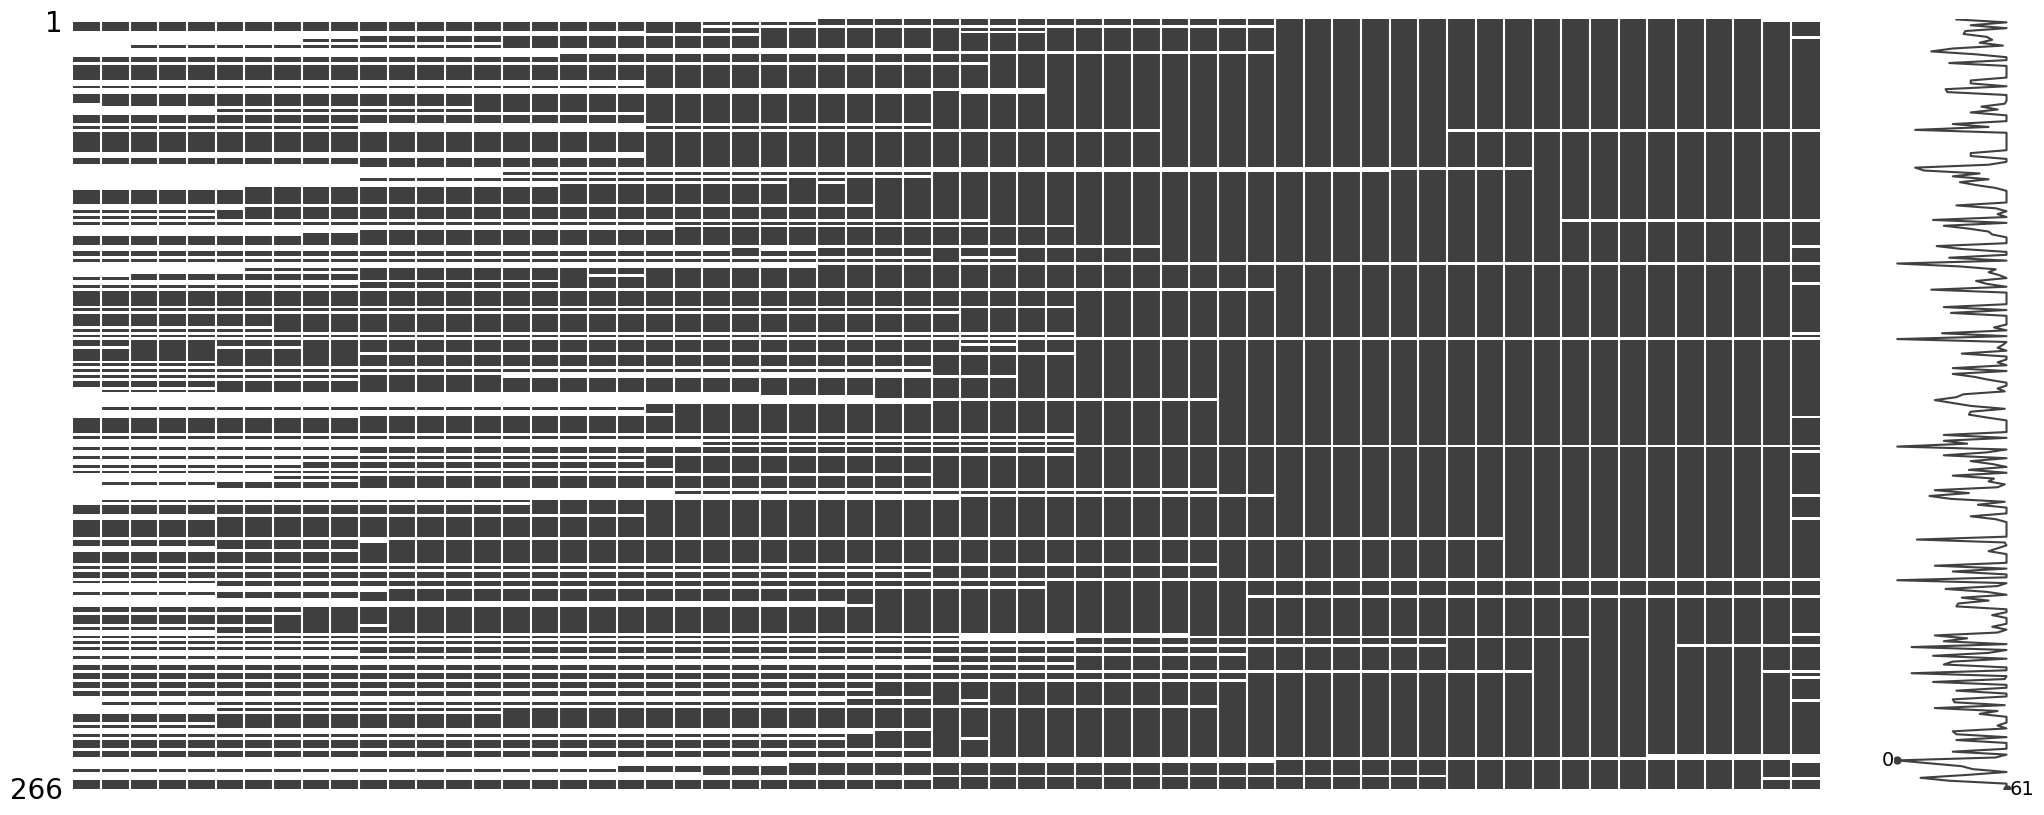

In [11]:
msno.matrix(df_numerical)

In [12]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.280000e+02,1.340000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.480000e+02,1.510000e+02,1.540000e+02,1.590000e+02,1.590000e+02,...,2.580000e+02,2.570000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.530000e+02,2.410000e+02
mean,7.212620e+10,7.253422e+10,7.563842e+10,8.157455e+10,8.961293e+10,9.099092e+10,1.012580e+11,1.050472e+11,1.101137e+11,1.217651e+11,...,2.759371e+12,2.407733e+12,2.482235e+12,2.552297e+12,2.407171e+12,2.447089e+12,2.620383e+12,2.786476e+12,2.864599e+12,2.902891e+12
std,2.176036e+11,2.218540e+11,2.356864e+11,2.535576e+11,2.773002e+11,2.912243e+11,3.188597e+11,3.372441e+11,3.591549e+11,3.953002e+11,...,8.812007e+12,8.167101e+12,8.387677e+12,8.614521e+12,8.170629e+12,8.321307e+12,8.851830e+12,9.424050e+12,9.619814e+12,9.541022e+12
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.871181e+07,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,4.885555e+07
25%,4.930171e+08,5.007338e+08,5.317365e+08,5.161478e+08,5.828164e+08,5.981193e+08,6.526923e+08,6.381097e+08,6.713500e+08,7.234677e+08,...,8.106591e+09,8.709165e+09,8.747774e+09,9.297231e+09,8.738203e+09,8.666853e+09,9.565595e+09,1.046233e+10,1.131495e+10,1.218235e+10
50%,2.661047e+09,2.966849e+09,2.814319e+09,3.540403e+09,3.405333e+09,3.038595e+09,3.170500e+09,3.377453e+09,3.941700e+09,4.485778e+09,...,4.687279e+10,4.658046e+10,4.981676e+10,5.114388e+10,5.006595e+10,4.886913e+10,5.332271e+10,5.614404e+10,6.113687e+10,6.240971e+10
75%,2.209377e+10,2.947115e+10,2.886179e+10,3.341615e+10,3.106358e+10,2.717988e+10,2.892630e+10,3.037142e+10,3.339213e+10,3.744464e+10,...,5.702930e+11,5.524840e+11,5.447092e+11,5.456262e+11,5.051040e+11,5.261240e+11,5.666715e+11,5.634442e+11,5.972810e+11,7.522480e+11
max,1.387920e+12,1.444480e+12,1.546110e+12,1.666850e+12,1.825210e+12,1.988350e+12,2.157980e+12,2.296120e+12,2.478140e+12,2.733380e+12,...,8.149280e+13,7.535600e+13,7.742740e+13,7.953110e+13,7.510080e+13,7.629400e+13,8.118190e+13,8.625120e+13,8.755520e+13,8.467990e+13


In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Density (per km²)'], bins=30, kde=True)
plt.title('Distribution of Population Density')
plt.xlabel('Density (per km²)')
plt.ylabel('Frequency')
plt.show()

KeyError: 'Density (per km²)'

<Figure size 1200x600 with 0 Axes>